In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point

## Province shapefiles

In [2]:
gdf = gpd.read_file("../../../Vietnam/Data/Maps/province_files/province.shp")

gdf.set_crs(
    epsg="32648", inplace=True
)  

gdf.to_crs(
    epsg="4326", inplace = True
)

gdf = gdf.to_crs(epsg=4326) 

gdf.rename({'C99_RP': 'province'}, axis=1, inplace=True)


gdf['geometry'] = gdf.geometry.to_crs("epsg:4326")

gdf['centroid'] = gdf.centroid.to_crs("epsg:4326")

gdf['longitude'] = gdf['centroid'].apply(lambda p: p.x)

gdf["latitude"] = gdf.centroid.apply(lambda p: p.y)

gdf.explore()

## Minot

In [3]:
minot = pd.read_stata('../../../Vietnam/Data/IFPRI/Minot REPORT/GIS Data/GIS_var1.dta')

minot = minot[['district_code_c99_rpd', 'y_coord', 'utm48_coordinates_district_centr']]

minot.rename({'district_code_c99_rpd': 'district'}, axis=1, inplace=True)

minot = gpd.GeoDataFrame(
    minot,
    geometry=gpd.points_from_xy(minot.utm48_coordinates_district_centr, minot.y_coord)
)

minot.set_crs(epsg="32648", inplace=True)

minot.to_crs(epsg="4326", inplace = True)

minot['longitude'] = minot['geometry'].x

minot["latitude"] = minot['geometry'].y

## Archives

In [8]:
prov_arch = pd.read_stata('../../../Vietnam/Data/war_data_province_sep09.dta')
prov_arch = prov_arch[['north_lat', 'east_long']]
prov_arch = gpd.GeoDataFrame(
    prov_arch,
    geometry=gpd.points_from_xy(prov_arch.east_long, prov_arch.north_lat)
)
dist_arch = pd.read_stata('../../../Vietnam/Data/war_data_district_sep09.dta')
dist_arch = dist_arch[['north_lat', 'east_long']]
dist_arch = gpd.GeoDataFrame(
    dist_arch,
    geometry=gpd.points_from_xy(dist_arch.east_long, dist_arch.north_lat)
)

north_lat   east_long                    geometry
0    23.267633  105.860718  POINT (105.86072 23.26763)
1    23.309893  105.851402  POINT (105.85140 23.30989)
2    23.256073  105.887474  POINT (105.88747 23.25607)
3    23.237648  105.895546  POINT (105.89555 23.23765)
4    23.243963  105.852165  POINT (105.85217 23.24396)
..         ...         ...                         ...
579  10.402974  104.949043  POINT (104.94904 10.40297)
580  10.055305  104.958687  POINT (104.95869 10.05531)
581   9.866639  104.966202   POINT (104.96620 9.86664)
582   9.948012  105.257355   POINT (105.25735 9.94801)
583   9.695915  105.023933   POINT (105.02393 9.69592)

[584 rows x 3 columns]

# For the erratum

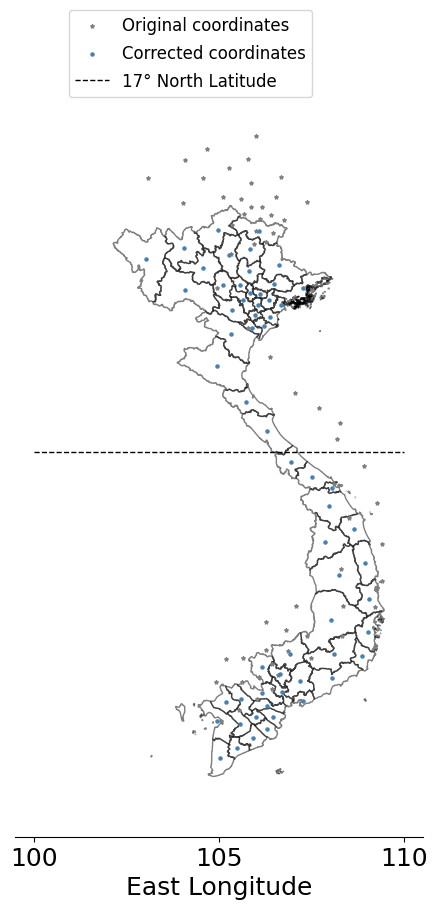

In [68]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(
    figsize=(20, 10)
)

gdf.plot(
    ax=ax,
    facecolor="none", 
    alpha=0.5,
    edgecolor='k',
    aspect=2
)


prov_arch.plot(
    ax=ax,
    marker='*',
    color='grey',
    markersize=7,
    label='Original coordinates'
)


gdf['centroid'].plot(
    ax=ax,
    marker='o',
    color='#4682B4',
    markersize=5,
    label='Corrected coordinates'
)


plt.plot(
    [100, 110],
    [17, 17],
    linewidth = 1,
    linestyle = "--",
    color = "k",
    label='17° North Latitude'
)

ax.spines[['right', 'top', 'left']].set_visible(False)

ax.get_yaxis().set_visible(False)

ax.legend(
    scatterpoints=1, 
    frameon=True,
    labelspacing=0.6, 
    loc='lower right', 
    fontsize=12, 
    bbox_to_anchor=(0.75,.95), 
    title_fontsize=10
)
listOf_Xticks = np.arange(100, 111, 5)
plt.xticks(listOf_Xticks)
listOf_Yticks = np.arange(7, 28, 5)
plt.yticks(listOf_Yticks)
plt.xlabel('East Longitude')
plt.show()
fig.savefig("../outputs/figures/provinces_erratum.png", bbox_inches='tight', dpi=600)


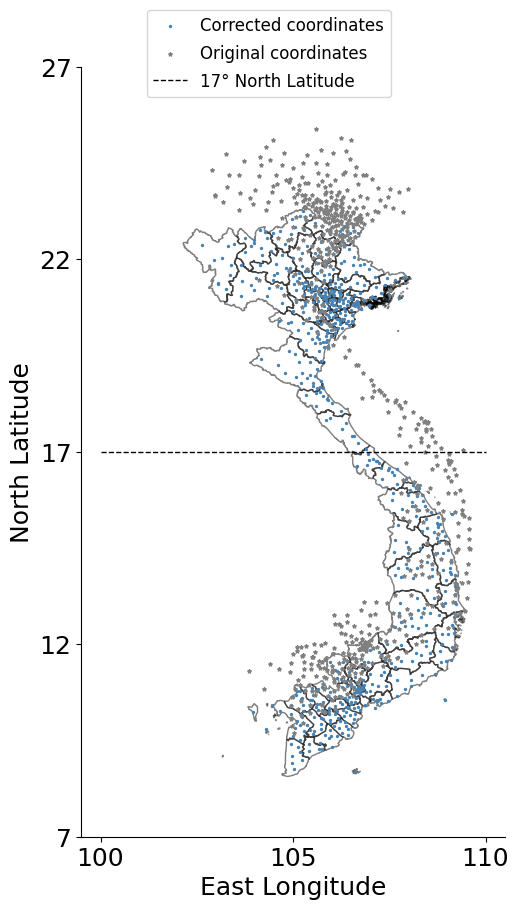

In [69]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(
    figsize=(20, 10)
)
gdf.plot(
    ax=ax,
    facecolor="none", 
    alpha=0.5,
    edgecolor='k',
    aspect=2
)

minot.plot(
    ax=ax,
    marker='o',
    color='#4682B4',
    markersize=2,
    label='Corrected coordinates'
)

dist_arch.plot(
    ax=ax,
    marker='*',
    color='grey',
    markersize=7,
    label='Original coordinates'
)


plt.plot(
    [100, 110],
    [17, 17],
    linewidth = 1,
    linestyle = "--",
    color = "k",
    label='17° North Latitude'
)

ax.legend(
    scatterpoints=1, 
    frameon=True,
    labelspacing=0.6, 
    loc='lower right', 
    fontsize=12, 
    bbox_to_anchor=(0.75,.95), 
    title_fontsize=10
)
ax.spines[['right', 'top']].set_visible(False)
listOf_Xticks = np.arange(100, 111, 5)
plt.xticks(listOf_Xticks)
listOf_Yticks = np.arange(7, 28, 5)
plt.yticks(listOf_Yticks)
 

plt.xlabel('East Longitude')
plt.ylabel('North Latitude')
plt.show()

fig.savefig("../outputs/figures/districts_erratum.png", bbox_inches='tight', dpi=600)

